# Eigenfaces a

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from numpy.linalg import matrix_rank
from numpy.linalg import inv

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

In [2]:
# Split data set
# Train_id is the index of each train data in the total data set, test_id the same

from sklearn.model_selection import train_test_split

indices = np.arange(len(face_id[0]))
train_data, test_data, train_id, test_id = train_test_split(face_data.T, indices, test_size = 0.2)
train_data = train_data.T
test_data = test_data.T

print(train_data)
print(train_data.shape)
print(test_data)
print(test_data.shape)

[[ 84 182  82 ... 173  57 164]
 [ 78 180  82 ... 158  60 169]
 [ 75 174  84 ... 163  57 176]
 ...
 [ 35 121 147 ...  33 116  32]
 [ 35 117 152 ...  36 123  29]
 [ 36 112 151 ...  37 119  27]]
(2576, 416)
[[231 101 124 ...  54 126 241]
 [242 108 146 ...  53 118 226]
 [246 105 147 ...  51 124 228]
 ...
 [118  13  55 ... 123  51  44]
 [196  11  69 ... 135  33  39]
 [170  10  74 ... 132  25  44]]
(2576, 104)


In [3]:
# Count the number of face images for each person 
# in the train and test set after randomly split

train_label = face_id[0,train_id]
unique_train, counts_train = np.unique(train_label, return_counts=True)
dict(zip(unique_train, counts_train))

#test_label = face_id[0,test_id]
#unique_test, counts_test = np.unique(test_label, return_counts=True)
#dict(zip(unique_test, counts_test))

#print(unique_train)
#print(train_label)
#print(counts_train)


{1: 7,
 2: 8,
 3: 9,
 4: 7,
 5: 7,
 6: 6,
 7: 10,
 8: 9,
 9: 6,
 10: 7,
 11: 8,
 12: 10,
 13: 10,
 14: 7,
 15: 6,
 16: 6,
 17: 8,
 18: 8,
 19: 8,
 20: 9,
 21: 9,
 22: 7,
 23: 5,
 24: 6,
 25: 10,
 26: 10,
 27: 9,
 28: 10,
 29: 9,
 30: 9,
 31: 8,
 32: 8,
 33: 6,
 34: 7,
 35: 9,
 36: 8,
 37: 7,
 38: 10,
 39: 7,
 40: 8,
 41: 8,
 42: 8,
 43: 8,
 44: 9,
 45: 8,
 46: 8,
 47: 9,
 48: 7,
 49: 9,
 50: 7,
 51: 9,
 52: 8}

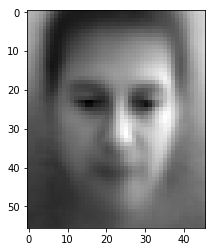

In [4]:
# Compute average face vector

num_train = len(train_data[0])

avg_face = train_data.mean(axis=1)

plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')

#print(train_data.shape)
#print(num_train)

In [5]:
# Compute covariance matrix without low-dimensional compution

num_pix = len(train_data)

A = train_data - avg_face.reshape(num_pix,1)
S = (A.dot(A.T)) / num_train

#print(num_pix)

In [6]:
# Compute the egenvalues
# Due to numerical error, some eigenvalues are complex but they have
# negligible imaginary parts. Morover real symetric covariance 
# matrix always has real eigenvalues and eigenvectors.

eigvals, eigvecs = np.linalg.eig(S)
eigvals = eigvals.real
eigvecs = eigvecs.real

In [7]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals.shape)
print(eigvecs.shape)

nonzero_eigvals = eigvals[abs(eigvals) >= 1e-7]
print(nonzero_eigvals.shape)

eigvecs_nonzero_eigvals = eigvecs[:,abs(eigvals) >= 1e-7]
print(eigvecs_nonzero_eigvals.shape)

(2576,)
(2576, 2576)
(415,)
(2576, 415)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 71 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 88 90 91 92 93 94 95
 96 97 98 99]
(2576, 100)


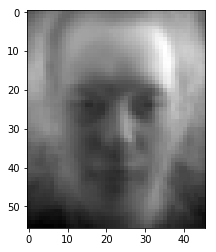

In [8]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces

M = 100 # Number of eigenvectors with M largest eigenvalues to be used

sorted_index = np.argsort(-nonzero_eigvals)[:M]
print(sorted_index)

eigfaces = eigvecs_nonzero_eigvals[:,sorted_index]
print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# Eigenfaces b

In [9]:
# Compute covariance matrix with low-dimensional compution

S_low_dim = ((A.T).dot(A)) / num_train

print(matrix_rank(A))
print(S.shape)
print(S_low_dim.shape)

415
(2576, 2576)
(416, 416)


In [10]:
# Compute the egenvalues 

eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
eigvals_low_dim = eigvals_low_dim.real
eigvecs_low_dim = eigvecs_low_dim.real

In [11]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals_low_dim.shape)
print(eigvecs_low_dim.shape)

nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
print(nonzero_eigvals_low_dim.shape)

eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
print(eigvecs_nonzero_eigvals_low_dim.shape)

(416,)
(416, 416)
(415,)
(416, 415)


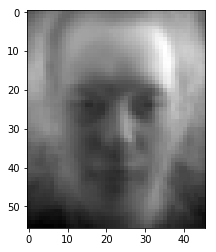

In [12]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces and 
# convert them to the eigenvectors of S and normalize them

eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M]])

eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T

#print(eigfaces_low_dim[:,0])
#print(eigfaces[:,0])
#print(eigfaces_low_dim.shape)

plt.imshow(np.reshape(eigfaces_low_dim[:,0],(46,56)).T, cmap = 'gist_gray')

# Application of Eigenfaces a (reconstruction)

In [13]:
# Project faces onto eigenfaces

W = (A.T).dot(eigfaces_low_dim) 
# the ith row of w represents the projection of the ith image
# the number of columns is the number of eigenfaces
# the number of rows is number of training data

print(W)

[[ -922.39994599  -242.2601015    847.24709315 ...    53.43522273
     -8.12981802   -31.98605466]
 [ 1711.38681662   845.43688343  -475.95211741 ...    31.9763393
      9.93423667    51.0511837 ]
 [  793.21695347  -209.70726473   509.6252015  ...   -35.98416969
     18.62575401    66.73036697]
 ...
 [ 1767.47336834    88.08282385   419.56085251 ...    30.16167037
   -103.09492361   -47.1958111 ]
 [-1033.68585544   475.60510554   815.27897029 ...     6.61797883
     13.53217045     7.12799229]
 [ 1007.87762779   541.98961197 -1008.27017722 ...   100.10525438
     64.43091754   157.72594301]]


524.5628908635507


(Text(0.5,1,'Reconstructed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

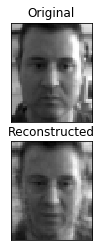

In [14]:
# Face image reconstruction

reconstructed_train_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W.T)

error_train = np.linalg.norm((train_data - reconstructed_train_data),axis=0)
print(np.average(error_train))

plt.subplot(211),plt.imshow(np.reshape(train_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_train_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

# Application of Eigenfaces b (NN classification)

In [15]:
A_test = test_data - avg_face.reshape(num_pix,1)
W_test = (A_test.T).dot(eigfaces_low_dim)

print(W_test.shape)

test_results = []
for row in W_test:
    index = np.argmin(np.linalg.norm(row - W, axis=1))
    test_results.append(face_id[0,train_id[index]])
    
true_results = face_id[0,test_id]

print(true_results)
print(test_results)

(104, 100)
[20 41 34 37 15 19 22 33  8 22  2 36 23 29 43 42 44 11 50  6  4  5 15 33
  1  6 39 45  3 36 52 11 23 49 48 33 33 23 45  1 10  1 24 40 19 27 24 35
 14  2  4 15  6 23 32  9 30 16 34 32  5  9 50 16 46 23 37  9  4 22 48 52
 31 34 46  6 50 43 10 17 39  9 18  5 48 40 37 14 39 42 16 16 18 10 14 24
 15 41 47 51 24 17 31 21]
[20, 41, 35, 37, 15, 25, 14, 33, 8, 22, 32, 36, 23, 29, 27, 42, 29, 11, 39, 51, 3, 5, 22, 33, 10, 6, 39, 45, 3, 36, 52, 29, 16, 49, 48, 11, 33, 23, 45, 1, 10, 42, 24, 35, 49, 25, 6, 35, 15, 5, 4, 21, 6, 11, 32, 9, 47, 8, 34, 32, 5, 9, 50, 7, 46, 23, 39, 9, 4, 11, 39, 52, 31, 8, 46, 6, 50, 11, 10, 30, 39, 9, 18, 5, 29, 40, 37, 20, 39, 44, 35, 16, 46, 10, 14, 7, 22, 46, 17, 51, 24, 17, 31, 21]


0.6057692307692307
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


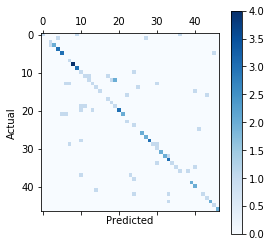

In [16]:
results_error = test_results - true_results

success_rate = np.count_nonzero(results_error == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Error: 938.0


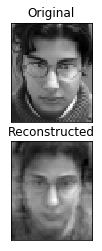

In [17]:
j = 5

reconstructed_test_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W_test.T)

error = np.linalg.norm(test_data[:,j].reshape(num_pix,1) - reconstructed_test_data[:,j].reshape(num_pix,1))

plt.subplot(211),plt.imshow(np.reshape(test_data[:,j],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_test_data[:,j],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

print("Error: " + str(round(error)))

# Application of Eigenfaces b (Alternative method learnt)

In [19]:
import time
start = time.time()

M_AM = 1

def eigspace_generator(data):
    num_train = len(data[0])
    avg_face = data.mean(axis=1)
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
    
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_AM]]) 
    # Choose all the eigenvectors as eigenfaces in low_dim this case, since the maximum number of eigenfaces would
    # not exceed 10
    
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    list_eig_space.append(eigfaces_low_dim)
    
    list_avg_face.append(avg_face)

    
num_people = max(train_label)
eig_space = np.zeros((num_people,num_pix,M_AM))
sorted_train_data = train_data[:,np.argsort(train_label)]

list_eig_space = [] # Each element of list_eig_space contains the eigenspace of the i+1th person
list_avg_face = [] # Each element of list_avg_face contains the average face of the i+1th person
list_projection = [] # Each element of list_projection contains the projection of the jth test data to different eigenspaces
test_results_AM = []

# Generate all eigenspaces
column = 0
for i in range(num_people):
    num_faces = train_label.tolist().count(i+1)
    eigspace_generator(sorted_train_data[:,column : column + num_faces])
    column += num_faces


In [20]:
# Project each test data onto each eigenspace
for j in range(len(test_data[0])): 
    error = [];
    for i in range(num_people): 
        avgface_i = np.asarray(list_avg_face[i]).reshape(num_pix,1)
        w = ((test_data[:,j].reshape(num_pix,1) - avgface_i).T).dot(list_eig_space[i]) # vector containing projection
        reconstructed_data = avgface_i + list_eig_space[i].dot(w.T) 
        error.append(np.linalg.norm(test_data[:,j].reshape(num_pix,1) - reconstructed_data))
        #print(test_data[:,j].shape)
        #print(reconstructed_data)
        #print('/n')
    test_results_AM.append(np.argmin(error) + 1)
    
print(true_results)
print (test_results_AM)

[20 41 34 37 15 19 22 33  8 22  2 36 23 29 43 42 44 11 50  6  4  5 15 33
  1  6 39 45  3 36 52 11 23 49 48 33 33 23 45  1 10  1 24 40 19 27 24 35
 14  2  4 15  6 23 32  9 30 16 34 32  5  9 50 16 46 23 37  9  4 22 48 52
 31 34 46  6 50 43 10 17 39  9 18  5 48 40 37 14 39 42 16 16 18 10 14 24
 15 41 47 51 24 17 31 21]
[20, 27, 34, 37, 15, 25, 6, 33, 8, 22, 2, 36, 23, 47, 43, 42, 29, 11, 39, 17, 3, 5, 15, 33, 1, 6, 39, 39, 3, 31, 52, 36, 16, 26, 48, 7, 33, 23, 45, 1, 10, 1, 24, 35, 17, 51, 19, 33, 22, 5, 4, 20, 6, 26, 32, 9, 30, 8, 34, 40, 5, 9, 50, 42, 40, 23, 37, 9, 4, 18, 47, 52, 31, 13, 46, 19, 26, 42, 10, 30, 39, 9, 18, 5, 48, 34, 37, 3, 14, 42, 2, 19, 32, 10, 2, 1, 15, 46, 17, 51, 24, 17, 27, 21]


In [21]:
end = time.time()
print(end - start)

5.500298976898193


0.5673076923076923
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


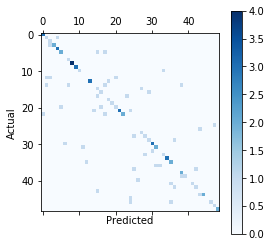

In [22]:
results_error_AM = test_results_AM - true_results

success_rate_AM = np.count_nonzero(results_error_AM == 0) / len(true_results)
print(success_rate_AM)

cm_AM = confusion_matrix(true_results, test_results_AM)

print(cm_AM)
plt.matshow(cm_AM, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Error of same ID: 1650.0       different ID: 2065.0


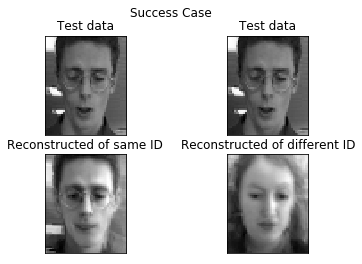

In [175]:
j = 2

#same
i = true_results[j] - 1

avgface_i = np.asarray(list_avg_face[i]).reshape(num_pix,1)
w = ((test_data[:,j].reshape(num_pix,1) - avgface_i).T).dot(list_eig_space[i]) # vector containing projection
reconstructed_data = avgface_i + list_eig_space[i].dot(w.T) 
error1 = np.linalg.norm(test_data[:,j].reshape(num_pix,1) - reconstructed_data)

plt.subplot(221),plt.imshow(np.reshape(test_data[:,j],(46,56)).T, cmap = 'gist_gray')
plt.title('Test data'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(np.reshape(reconstructed_data,(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed of same ID'), plt.xticks([]), plt.yticks([])

#different
i = 1

avgface_i = np.asarray(list_avg_face[i]).reshape(num_pix,1)
w = ((test_data[:,j].reshape(num_pix,1) - avgface_i).T).dot(list_eig_space[i]) # vector containing projection
reconstructed_data = avgface_i + list_eig_space[i].dot(w.T) 
error2 = np.linalg.norm(test_data[:,j].reshape(num_pix,1) - reconstructed_data)

plt.subplot(222),plt.imshow(np.reshape(test_data[:,j],(46,56)).T, cmap = 'gist_gray')
plt.title('Test data'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(np.reshape(reconstructed_data,(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed of different ID'), plt.xticks([]), plt.yticks([])

plt.suptitle('Success Case')
    
print("Error of same ID: " + str(round(error1)) + "       different ID: " + str(round(error2)))

# PCA-LAD

In [155]:
sorted_train_data = train_data[:,np.argsort(train_label)]
sorted_train_label = train_label[np.argsort(train_label)]

In [75]:
# Compute class mean M, the class mean for the i-th class is the 
# i-th column vector of M 

c = len(counts_train) # number of classes
M = np.zeros((num_pix, c))

list_Sw = [] # Each element of list_Sw contains the with-in scatter matrix of the i+1th class

current_index = 0;
for idx,cnt in enumerate(counts_train):
    X = sorted_train_data[:,current_index : current_index + cnt]
    M[:,idx] = (X.mean(axis=1))
    A_Sw =  X - M[:,idx].reshape(num_pix,1)
    Sw = A_Sw.dot(A_Sw.T)
    list_Sw.append(Sw)
    current_index += cnt

In [76]:
# Compute between-scatter matrix Sb

A_Sb =  M - avg_face.reshape(num_pix,1)
Sb = A_Sb.dot(A_Sb.T)
print(matrix_rank(Sb))
print(c-1)

51
51


In [77]:
# Compute within-scatter matrix Sw
N = num_train
Sw = np.zeros((num_pix,num_pix))

for i in range(c):
    Sw += list_Sw[i]
    
print(matrix_rank(Sw))
print(N-c)

364
364


In [116]:
# PCA to reduce dimenstion to Mpca

M_pca= 150
    
W_pca_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_pca]]) 
W_pca = (preprocessing.normalize(W_pca_unnormalized.T, norm='l2')).T

In [117]:
# Project Sw and Sb to PCA reduced subspace
Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))

#print(Sw_pca.shape)

In [132]:
# Perform LDA on the reduced subspace

eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
eigvals_lda = eigvals_lda.real
eigvecs_lda = eigvecs_lda.real

print(matrix_rank((inv(Sw_pca)).dot(Sb_pca)))
print(eigvals_lda.shape)
print(eigvecs_lda.shape)

nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
print(nonzero_eigvals_lda.shape)

eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
print(eigvecs_nonzero_eigvals_lda.shape)

M_lda = 50

sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]
#print(sorted_index_lda)

W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
print(W_lda.shape)


51
(150,)
(150, 150)
(51,)
(150, 51)
(150, 50)


In [133]:
# NN-classification

# Project train faces onto LDA subspace
W_train_pca = (A.T).dot(W_pca)
W_train_lda = (W_train_pca).dot(W_lda)

A_test_lda = test_data - avg_face.reshape(num_pix,1)

# Project test data to PCA subspace
W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace

# Project test data to LDA subspace
W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace

print(W_test_pca.shape)
print(W_test_lda.shape)

test_results_lda = []
for row in W_test_lda:
    index = np.argmin(np.linalg.norm(row - W_train_lda, axis=1))
    test_results_lda.append(face_id[0,train_id[index]])
    
true_results = face_id[0,test_id]

print(true_results)
print(test_results_lda)



(104, 150)
(104, 50)
[40 23 35  9 48 49 26 50 18 46 51 34 32  4 13 28 34 17 11 11 30 27 52 13
 14 50 37 39 11 31 27  5 11 44  8 45 24 45 47 17 38 35  2  5  2 24 43 12
 38 19 35  5 49 46 49 25  6 30 24  2 12 11 22 38 20 36 46  6 34 12 44 42
 26 44 49 37 50 25 14 20  9  8 34 26 20 15  5 33  3 31 47 41 32 51 18 13
  1 26 47 44 46 14  5 48]
[40, 23, 35, 9, 48, 49, 26, 38, 18, 46, 51, 34, 32, 4, 13, 28, 32, 17, 11, 11, 29, 27, 52, 13, 14, 39, 37, 39, 11, 31, 27, 5, 49, 44, 8, 45, 25, 45, 33, 17, 26, 35, 2, 5, 2, 24, 43, 12, 38, 19, 35, 5, 49, 46, 49, 25, 6, 30, 24, 2, 12, 11, 22, 38, 20, 36, 16, 6, 34, 12, 44, 42, 38, 44, 49, 37, 50, 25, 14, 20, 9, 8, 32, 26, 20, 21, 5, 33, 3, 31, 38, 41, 32, 51, 18, 13, 1, 26, 47, 29, 29, 14, 5, 48]


0.8557692307692307
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


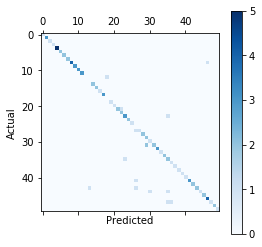

In [134]:
results_error_lda = test_results_lda - true_results

success_rate = np.count_nonzero(results_error_lda == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results_lda)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

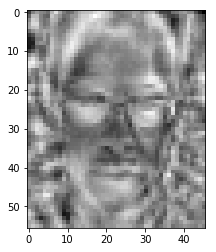

In [135]:
# Generate fisherfaces by converting Wlda back to its original data space

fisherfaces = W_pca.dot(W_lda) # Columns are fisherfaces

plt.imshow(np.reshape(fisherfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# PCA-LDA Ensemble 

In [176]:
import random

T = 10
M0 = 100
M1 = 100
# Mpca = M0 + M1 should not exceed 
M_lda = 25
n_sample = 7 # number of samples per class

# Generate random subspaces 
def rand_subspace(eigvecs,eigvals):
    subspace = eigvecs[:,np.argsort(-eigvals)[ : M0]]
    #print(len(eigvals))
    index = (np.argsort(eigvals)[ : len(eigvals) - M0]).tolist()
    rand_index = random.sample(index, M1)  
    subspace = np.concatenate((subspace, eigvecs[:,rand_index]), axis=1)
    return subspace

# Bagging (from every class)
def rand_sample(sorted_train_data,sorted_train_label,counts_train):
    sample = list()
    label = list()
    current_index = 0
    for idx,cnt in enumerate(counts_train):
        for j in range(n_sample):
            index = random.randrange(current_index, current_index + cnt, 1)
            sample.append(sorted_train_data[:,index])
            label.append(sorted_train_label[index])
        current_index += cnt
    
    return ((np.asarray(sample)).T), np.asarray(label)

# Generate eigenspace of data set using PCA
def eigspace_generator_ensemble(data):
    num_train = len(data[0])
    avg_face = data.mean(axis=1)
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:]]) 
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    return eigfaces_low_dim, nonzero_eigvals_low_dim


In [177]:
def lda_rand_subspace(W_pca,test_data): # test_data single column vector
    
    Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
    Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))
    
    eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
    eigvals_lda = eigvals_lda.real
    eigvecs_lda = eigvecs_lda.real

    nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
    eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
    
    sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]

    W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
    
    # NN-classification

    W_train_pca = (A.T).dot(W_pca)
    W_train_lda = (W_train_pca).dot(W_lda)
    sorted_W_train_lda = W_train_lda[np.argsort(train_label),:]

    A_test_lda = test_data.reshape(num_pix,1) - avg_face.reshape(num_pix,1)

    # Project test data to PCA subspace
    W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace
    # Project test data to LDA subspace
    W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace
    
    distance = np.linalg.norm(W_test_lda - sorted_W_train_lda, axis=1) # row vector containing Euclidiean distance to each tranining data
   
        
    min_distance = []
    current_index = 0;
    for idx,cnt in enumerate(counts_train):
        distance = distance.reshape(len(distance),1)
        distance[current_index : current_index + cnt,:]
        min_distance.append(min(distance[current_index : current_index + cnt,:]))
        current_index += cnt
    
    post_distribution = (min_distance / sum(min_distance)) 
    
    return post_distribution

In [178]:
def lda_cascade(train_data,train_label,W_pca,test_data): # test_data single column vector


    avg_face = train_data.mean(axis=1)
    num_pix = len(train_data)
    unique_train, counts_train = np.unique(train_label, return_counts=True)
    c = max(train_label) # number of classes
    M = np.zeros((num_pix, c))

    list_Sw = [] # Each element of list_Sw contains the with-in scatter matrix of the i+1th class

    current_index = 0;
    for idx in range(c):
        X = train_data[:,current_index : current_index + n_sample]
        M[:,idx] = (X.mean(axis=1))
        A_Sw =  X - M[:,idx].reshape(num_pix,1)
        Sw = A_Sw.dot(A_Sw.T)
        list_Sw.append(Sw)
        current_index += n_sample

    # Compute between-scatter matrix Sb

    A_Sb =  M - avg_face.reshape(num_pix,1)
    Sb = A_Sb.dot(A_Sb.T)

    # Compute within-scatter matrix Sw
    Sw = np.zeros((num_pix,num_pix))

    for i in range(c):
        Sw += list_Sw[i]

    # PCA to reduce dimenstion to Mpca
    
    Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
    Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))
    
    eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
    eigvals_lda = eigvals_lda.real
    eigvecs_lda = eigvecs_lda.real

    nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
    eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
    
    sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]

    W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]

    # NN-classification

    W_train_pca = (A.T).dot(W_pca)
    W_train_lda = (W_train_pca).dot(W_lda)
    sorted_W_train_lda = W_train_lda[np.argsort(train_label),:]

    A_test_lda = test_data.reshape(num_pix,1) - avg_face.reshape(num_pix,1)

    # Project test data to PCA subspace
    W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace
    # Project test data to LDA subspace
    W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace
    
    distance = np.linalg.norm(W_test_lda - sorted_W_train_lda, axis=1) # row vector containing Euclidiean distance to each tranining data
   
        
    min_distance = []
    current_index = 0;
    for idx,cnt in enumerate(counts_train):
        distance = distance.reshape(len(distance),1)
        distance[current_index : current_index + cnt,:]
        min_distance.append(min(distance[current_index : current_index + cnt,:]))
        current_index += cnt
    
    post_distribution = (min_distance / sum(min_distance)) 
    
    return post_distribution

# Cascade two randomization

In [12]:
# Bagging

S = []
S_label = []

for i in range(T):
    data,label = rand_sample(sorted_train_data,sorted_train_label,counts_train)
    S.append(data) # generate T random training subset
    S_label.append(label)

R = [] 
for i in range(T):
    eigenvectors, eigenvalues = eigspace_generator_ensemble(S[i])
    R.append(rand_subspace(eigenvectors,eigenvalues)) # generate T random subspaces
    

In [13]:
true_results = face_id[0,test_id]
print(true_results)

[ 6  2 48 36 13 50  7 13 47 26 21 47 20  3 20 25 33 51 41 11 31 31 30  8
  3  1 52 15 43 18  7 33 15  4 47 23 10 19 27 17 12 51  4 49  6 42 38  7
 17 48  8 51]


In [ ]:
test_results_ensemble = []
for i in range(len(test_data[0])):
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_cascade(S[j],S_label[j],R[j],test_data[:,i])) # perform lda on each subspaces learnt

    sum(post_distribution)
    index = np.argmin(sum(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    print(test_results_ensemble)
    
print(test_results_ensemble)

[10]
[10, 36]
[10, 36, 42]
[10, 36, 42, 28]


In [ ]:
results_error_ensemble = test_results_ensemble - true_results

success_rate = np.count_nonzero(results_error_ensemble == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results_ensemble)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Committe machine with randomized feature space

In [179]:
R = [] 
for i in range(T):
    R.append(rand_subspace(eigvecs_nonzero_eigvals,nonzero_eigvals)) # generate T random subspaces
    
test_results_ensemble = []
for i in range(len(test_data[0])):
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_rand_subspace(R[j],test_data[:,i])) # perform lda on each subspaces learnt

    index = np.argmin(sum(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    
print(test_results_ensemble)

[34, 20, 35, 9, 48, 49, 26, 38, 18, 46, 51, 34, 32, 4, 13, 28, 34, 17, 11, 11, 29, 27, 52, 13, 14, 39, 37, 39, 15, 31, 27, 5, 11, 44, 8, 45, 17, 45, 33, 17, 38, 41, 2, 5, 2, 24, 43, 12, 38, 19, 35, 5, 49, 46, 49, 25, 6, 30, 24, 2, 12, 11, 22, 38, 20, 36, 46, 6, 34, 12, 44, 42, 29, 30, 49, 37, 50, 25, 14, 20, 9, 8, 34, 26, 20, 20, 5, 33, 3, 31, 29, 41, 32, 51, 18, 13, 7, 26, 30, 29, 18, 14, 5, 48]


0.8365384615384616
[[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


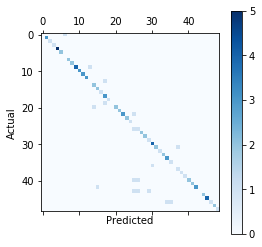

In [180]:
results_error_ensemble = test_results_ensemble - true_results

success_rate = np.count_nonzero(results_error_ensemble == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results_ensemble)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
y_pred = [19, 31, 21, 30, 43, 14, 19, 24, 21, 33, 38, 32, 38, 30, 14, 31, 51, 12, 23, 13, 5, 51, 26, 41, 17, 35, 4, 31, 47, 35, 21, 30, 37, 29, 3, 8, 12, 8, 8, 29, 33, 29, 8, 16, 49, 52, 9, 14, 8, 11, 44, 24]

In [ ]:
y_test = [24 31 21 30 43 14 22 24 44 33 52 32 47  2 14 31 51 12 23 13  5 51 26 41
 17 35 49 31 47 35 21 30 37 33  1 27 12 20 36 46 33 26 17 16 49 52  9 14
 45 11 44 24]

0.6923076923076923
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


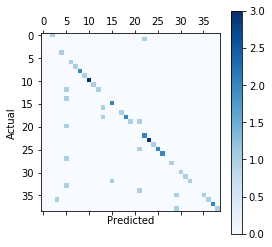

In [15]:
y_pred = [19, 31, 21, 30, 43, 14, 19, 24, 21, 33, 38, 32, 38, 30, 14, 31, 51, 12, 23, 13, 5, 51, 26, 41, 17, 35, 4, 31, 47, 35, 21, 30, 37, 29, 3, 8, 12, 8, 8, 29, 33, 29, 8, 16, 49, 52, 9, 14, 8, 11, 44, 24]

y_test = [24, 31, 21, 30, 43, 14, 22, 24, 44, 33, 52, 32, 47,  2, 14, 31, 51, 12, 23, 13,  5, 51, 26, 41, 17, 35, 49, 31, 47, 35, 21, 30, 37, 33,  1, 27, 12, 20, 36, 46, 33, 26, 17, 16, 49, 52,  9, 14, 45, 11, 44, 24]

results_error_ensemble= []
for i in range(0,len(y_pred)-1):
    results_error_ensemble.append( y_pred[i] - y_test[i] )

#results_error_ensemble = y_pred - y_test

success_rate = 1 - np.count_nonzero(results_error_ensemble) / len(y_test)
print(success_rate)

cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
len(y_test)

52